# Implement a multi-class perceptron algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import time


Initializing the weights with a RandomState to make the code reproducible

In [2]:
R = np.random.RandomState(21)               
weights_init=R.normal(0, 5, (257, 10))     

In [3]:
weights_init.shape

(257, 10)

Reading the data

In [4]:
train_in=np.genfromtxt('data/train_in.csv',delimiter=',')
train_out=np.genfromtxt('data/train_out.csv',delimiter=',')
test_in=np.genfromtxt('data/test_in.csv',delimiter=',')
test_out=np.genfromtxt('data/test_out.csv',delimiter=',')

Defining a function to create an array of the predictions for any dataset

In [5]:
def predictions(data,W):
    result=np.empty(len(data))
    for i , dat in enumerate(data):
        dat = np.append(dat, 1)    #adding the bias
        out = dat.dot(W)           #calulating the output
        result[i] = np.argmax(out) #getting the prediction by finding for which digit is the greatest output value
    
    return result
        

Defining a function to give us the percentage of the correct predictions <br>
This function calls the previous one in order to create the prediction array out from the dataset and then compares it with the output

In [6]:
def correct_percentage(data_in,data_out,weights):
    pred_test=predictions(data_in,weights) #getting the prediction using the predictions function
    correct = 0     
    for i in range(len(data_out)):
        if pred_test[i] == data_out[i]:    #checking if the prediction corresponds with the correct output
            correct += 1
    return correct/(len(data_out))         #return the number of correctly classified cases over the total

## Training the perceptron

### Using the whole traing dataset at once

In [7]:
t0=time.time()
# get the the output of the network by taking the dot of matrices W(eights) and T(rain).

eta = 0.2                 #learning rate
W = np.copy(weights_init) #initialize the weigts
T = np.array([np.append(row, 1) for row in train_in]) #create a matrix of the whole training set

sigmoid = lambda x: 1/(1+np.exp(-x))  #activation function

best_W = W  #use this to keep track of the best weights
accuracy = correct_percentage(train_in,train_out,W) #keep track of the accuracy of the above weights
best_accuracy = accuracy

# Counter for stopping condition (many runs without new record accuracy -> stop training)
consecutive_without_improvement = 0

accuracy_whole=[]
accuracy_whole_test=[]

while consecutive_without_improvement < 15 and accuracy< 1.0 :
    outs = sigmoid(np.dot(T, W))  #the dot product of the inputs with weights and then the activation function
                                  #is applied
    #d_outs = outs * (1-outs)

    ds = np.zeros((1707,10))                     #create an array of the correct outputs 
    for j, train_sample in enumerate(train_out):
        ds[j][int(train_sample)] = 1
    
    errors = ds - outs                        #calculate the difference between the correct and predicted output
    products = errors#*d_outs                 #multiply with the derivative, it is left out because it doesn't work
    delta_W = eta * np.dot(T.T, products)     #calculate the delta W using the neuron learning rule
    
    W += delta_W

    accuracy = correct_percentage(train_in,train_out,W)
    accuracy_whole.append(accuracy)      #saving the accuracy of the training set for plotting
    accuracy_whole_test.append(correct_percentage(test_in,test_out,W)) #saving the accuracy of the testing set 
                                                                        #only for plotting, we can't use that 
                                                                        #because we don't have access to the 
                                                                        #testing set while training
    

    if (accuracy > best_accuracy):
        best_W = np.copy(W)  #keeping the weights that give the best accuracy over the training set
        best_accuracy = accuracy  #keeping the best accuracy to compare it with the new ones
        consecutive_without_improvement = 0  #resetting the number of consecutive loops without improvement
        
    else:
        consecutive_without_improvement += 1 #increase the number of consecutive without improvement if accuracy 
                                             #isn't better than the best accuracy
        
if consecutive_without_improvement > 0:                          #delete the elements after the one with  
    del accuracy_whole[-consecutive_without_improvement:]        #the best accuracy
    del accuracy_whole_test[-consecutive_without_improvement:]
                          
W_whole = best_W   #saving the best weights 
RunningTime_whole=time.time()-t0 #saving the training time
print('Training time: %.3f seconds' %RunningTime_whole )
    

/home/ioannis/miniconda3/envs/IDL/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


Training time: 5.222 seconds


### Using each element one by one

In [8]:
t0=time.time()

eta = 0.2  #learning rate
W = np.copy(weights_init) #initialize the weights
g = lambda a: 1/(1+np.exp(-a)) #define our activation function which is a sigmoid


best_W = W  #use this to keep track of the best weights
accuracy = correct_percentage(train_in,train_out,W) #keep track of the accuracy of the above weights
best_accuracy = accuracy

# Counter for stopping condition (many runs without new record accuracy -> stop training)
consecutive_without_improvement = 0

accuracy_one=[accuracy]
accuracy_one_test=[correct_percentage(test_in,test_out,W)]

while consecutive_without_improvement < 15 and accuracy< 1.0:
    for i , vec in enumerate(train_in):
        vec = np.append(vec, 1) #adding the bias
        out = vec.dot(W)  #calculating the output
        out = np.array([g(a) for a in out]) #applying the activation function 

        d = np.zeros(10)
        d[int(train_out[i])] = 1

        error = (d - out) 
        delta_W = eta * np.outer(vec, error)
    
        W += delta_W #updating the weights  
    
    accuracy = correct_percentage(train_in,train_out,W)
    accuracy_one.append(accuracy)      #saving the accuracy of the training set for plotting
    accuracy_one_test.append(correct_percentage(test_in,test_out,W)) #saving the accuracy of the testing set 
                                                                     #only for plotting, we can't use that 
                                                                     #because we don't have access to the 
                                                                     #testing set while training    

    if (accuracy > best_accuracy):
        best_W = np.copy(W)  #keeping the weights that give the best accuracy over the training set
        best_accuracy = accuracy  #keeping the best accuracy to compare it with the new ones
        consecutive_without_improvement = 0  #resetting the number of consecutive loops without improvement
        
    else:
        consecutive_without_improvement += 1  #increase the number of consecutive without improvement if accuracy 
                                             #isn't better than the best accuracy
    
if consecutive_without_improvement > 0:                       #delete the elements after the one with  
    del accuracy_one[-consecutive_without_improvement:]       #the best accuracy
    del accuracy_one_test[-consecutive_without_improvement:] 

W_one = best_W   #saving the best weights 
RunningTime_one=time.time()-t0  #saving the training time
print('Training time: %.3f seconds' %RunningTime_one )

Training time: 9.639 seconds


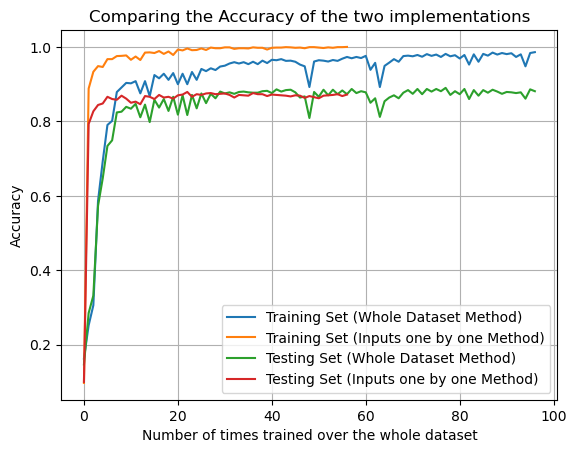

In [9]:
plt.title('Comparing the Accuracy of the two implementations')
plt.plot(accuracy_whole,label='Training Set (Whole Dataset Method)')
plt.plot(accuracy_one,label='Training Set (Inputs one by one Method)')
plt.plot(accuracy_whole_test,label='Testing Set (Whole Dataset Method)')
plt.plot(accuracy_one_test,label='Testing Set (Inputs one by one Method)')
plt.legend()
plt.grid()
plt.xlabel('Number of times trained over the whole dataset')
plt.ylabel('Accuracy')
plt.savefig('accuracy.png')
plt.show()

## Finding the accuracy 

### When training with the whole dataset

In [10]:
predictions_train=predictions(train_in,W_whole)

In [11]:
correct = 0
incorrect = 0
for i in range(len(train_out)):
    if predictions_train[i] == train_out[i]:
        correct += 1
    else:
        incorrect += 1

percentage_train_whole=correct/(correct + incorrect)

print("Performance of the perceptron on the traing set")
print("Correct: " + str(correct))
print("Incorrect: " + str(incorrect))
print("Percentage: " + str(round(correct/(correct + incorrect)*100,3))+'%')

Performance of the perceptron on the traing set
Correct: 1683
Incorrect: 24
Percentage: 98.594%


In [12]:
train_confusion=confusion_matrix(train_out, predictions_train)
print('Confusion matrix on training set')
print(train_confusion)

Confusion matrix on training set
[[318   0   0   0   0   1   0   0   0   0]
 [  0 252   0   0   0   0   0   0   0   0]
 [  0   0 196   1   1   1   1   1   1   0]
 [  0   0   1 126   1   2   0   0   1   0]
 [  0   0   0   0 120   0   0   1   1   0]
 [  0   0   0   1   0  86   0   0   1   0]
 [  0   0   0   0   1   0 150   0   0   0]
 [  0   0   1   0   0   1   0 163   1   0]
 [  0   0   0   0   1   1   0   0 142   0]
 [  0   0   0   0   0   0   0   1   1 130]]


In [13]:
predictions_test=predictions(test_in,W_whole)

In [14]:
correct = 0
incorrect = 0
for i in range(len(test_out)):
    if predictions_test[i] == test_out[i]:
        correct += 1
    else:
        incorrect += 1

percentage_test_whole=correct/(correct + incorrect)        

print("Performance of the perceptron on the traing set")
print("Correct: " + str(correct))
print("Incorrect: " + str(incorrect))
print("Percentage: " + str(round(correct/(correct + incorrect)*100,3))+'%')

Performance of the perceptron on the traing set
Correct: 881
Incorrect: 119
Percentage: 88.1%


In [15]:
test_confusion=confusion_matrix(test_out, predictions_test)
print('Confusion matrix on testing set')
print(test_confusion)

Confusion matrix on testing set
[[214   0   4   1   3   0   0   0   1   1]
 [  0 117   0   0   1   0   2   0   0   1]
 [  2   0  83   2   5   0   1   2   6   0]
 [  1   0   2  63   0   5   0   2   4   2]
 [  2   1   2   1  66   2   2   4   1   5]
 [  3   0   0   5   2  41   1   1   0   2]
 [  3   0   0   0   2   1  84   0   0   0]
 [  0   0   1   1   3   0   0  56   0   3]
 [  3   0   1   4   1   4   1   1  76   1]
 [  0   1   0   0   1   0   0   3   2  81]]


In [16]:
for i in range(10):
    a=test_confusion[i][i]/np.sum(test_confusion[i][:])
    print('digit = %d , accuracy = %.3f'%(i,a))

digit = 0 , accuracy = 0.955
digit = 1 , accuracy = 0.967
digit = 2 , accuracy = 0.822
digit = 3 , accuracy = 0.797
digit = 4 , accuracy = 0.767
digit = 5 , accuracy = 0.745
digit = 6 , accuracy = 0.933
digit = 7 , accuracy = 0.875
digit = 8 , accuracy = 0.826
digit = 9 , accuracy = 0.920


### When training with each element one by one

In [17]:
predictions_train_one=predictions(train_in,W_one)

In [18]:
correct = 0
incorrect = 0
for i in range(len(train_out)):
    if predictions_train_one[i] == train_out[i]:
        correct += 1
    else:
        incorrect += 1

percentage_train_one=correct/(correct + incorrect)
        
print("Performance of the perceptron on the traing set")
print("Correct: " + str(correct))
print("Incorrect: " + str(incorrect))
print("Percentage: " + str(round(correct/(correct + incorrect)*100,3))+'%')

Performance of the perceptron on the traing set
Correct: 1707
Incorrect: 0
Percentage: 100.0%


In [19]:
train_confusion_one=confusion_matrix(train_out, predictions_train_one)
print('Confusion matrix on training set')
print(train_confusion_one)

Confusion matrix on training set
[[319   0   0   0   0   0   0   0   0   0]
 [  0 252   0   0   0   0   0   0   0   0]
 [  0   0 202   0   0   0   0   0   0   0]
 [  0   0   0 131   0   0   0   0   0   0]
 [  0   0   0   0 122   0   0   0   0   0]
 [  0   0   0   0   0  88   0   0   0   0]
 [  0   0   0   0   0   0 151   0   0   0]
 [  0   0   0   0   0   0   0 166   0   0]
 [  0   0   0   0   0   0   0   0 144   0]
 [  0   0   0   0   0   0   0   0   0 132]]


In [20]:
predictions_test_one=predictions(test_in,W_one)

In [21]:
correct = 0
incorrect = 0
for i in range(len(test_out)):
    if predictions_test_one[i] == test_out[i]:
        correct += 1
    else:
        incorrect += 1

percentage_test_one=correct/(correct + incorrect)        
        
print("Performance of the perceptron on the traing set")
print("Correct: " + str(correct))
print("Incorrect: " + str(incorrect))
print("Percentage: " + str(round(correct/(correct + incorrect)*100,3))+'%')

Performance of the perceptron on the traing set
Correct: 872
Incorrect: 128
Percentage: 87.2%


In [22]:
test_confusion_one=confusion_matrix(test_out, predictions_test_one)
print('Confusion matrix on testing set')
print(test_confusion_one)

Confusion matrix on testing set
[[215   0   2   0   3   0   2   0   1   1]
 [  0 117   0   0   1   0   2   0   0   1]
 [  1   0  83   4   3   0   1   1   8   0]
 [  2   0   3  67   0   1   0   1   3   2]
 [  3   2   4   0  63   3   3   1   1   6]
 [  3   0   0   3   3  41   0   2   0   3]
 [  1   0   0   0   2   4  83   0   0   0]
 [  0   1   1   0   4   0   0  55   0   3]
 [  3   2   2   4   2   1   1   3  72   2]
 [  0   2   1   0   2   0   0   5   2  76]]


In [23]:
for i in range(10):
    a=test_confusion_one[i][i]/np.sum(test_confusion_one[i][:])
    print('digit = %d , accuracy = %.3f'%(i,a))

digit = 0 , accuracy = 0.960
digit = 1 , accuracy = 0.967
digit = 2 , accuracy = 0.822
digit = 3 , accuracy = 0.848
digit = 4 , accuracy = 0.733
digit = 5 , accuracy = 0.745
digit = 6 , accuracy = 0.922
digit = 7 , accuracy = 0.859
digit = 8 , accuracy = 0.783
digit = 9 , accuracy = 0.864


In [24]:
def printing_df(styler):
    styler.hide_index()
    styler.format(precision=3)
    return styler

In [25]:
results=pd.DataFrame({'Method':['Whole dataset','One by one'],
             'Training Set Accuracy':[percentage_train_whole,percentage_train_one],
            'Testing Set Accuracy':[percentage_test_whole,percentage_test_one],
            'Running Time':[RunningTime_whole,RunningTime_one]})

results.style.pipe(printing_df)

Method,Training Set Accuracy,Testing Set Accuracy,Running Time
Whole dataset,0.986,0.881,5.222
One by one,1.000,0.872,9.639
